In [97]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import numpy as np

In [60]:
def stratify_sample(data, att, n):
    lst_data = []
    unique_att = data[att].unique()
    for each_label in unique_att:
        lst_data.append(data[data[att]==each_label].sample(n=n))
    samples = lst_data[0]
    for each_data in lst_data[1:]:
        samples = pd.concat([samples, each_data])
    return samples

def make_ss(data, att, target, sort_att = False):
    
    lst = []
    unique_val_att = np.sort(data[att].unique())
    print(unique_val_att)
    
    for each_val in unique_val_att:
        lst.append(data[data[att]==each_val])
    
    ss = lst[0].describe()[target]
    
    if len(lst)>=2:
        for each_df in lst[1:]:
            ss = pd.concat([ss, each_df.describe()[target]], axis=1)
    
    return ss

In [86]:
arr = pd.read_feather('clustered_data.feather')
#sample = pd.read_feather('sample_for_plot.feather')

In [26]:
arr.head()

,index,trip_count,tip_amount,clean_fare_distance,fare_per_minute,misc_amount,trip_count_block,tip_amount_block,clean_fare_distance_block,fare_per_minute_block,misc_amount_block,score,score_block,score_block_kmeans,score_block_pca
0,0,1.0,0.00,5.382422,0.961098,0.00,1,1,2,2,1,7,1,2,1
1,1,1.0,0.00,2.470896,1.515615,0.09,1,1,1,3,3,9,2,3,1
2,2,1.0,0.17,5.779702,0.987342,0.05,1,3,2,2,2,10,2,1,1
3,3,1.0,0.17,3.096418,1.096052,0.01,1,3,2,2,1,9,2,4,1
4,4,1.0,0.08,3.004514,1.038552,0.00,1,1,1,2,1,6,1,2,1


In [3]:
arr.drop(labels=['score_block_kmeans', 'score_block_pca', 'score', 'index', 'trip_count_block', 'tip_amount_block',
                'clean_fare_distance_block', 'fare_per_minute_block', 
                 'misc_amount_block', 'score'], axis=1, inplace = True)

In [62]:
arr.head()

,index,trip_count,tip_amount,clean_fare_distance,fare_per_minute,misc_amount,trip_count_block,tip_amount_block,clean_fare_distance_block,fare_per_minute_block,misc_amount_block,score,score_block,score_block_kmeans,score_block_pca
0,0,1.0,0.00,5.382422,0.961098,0.00,1,1,2,2,1,7,1,2,1
1,1,1.0,0.00,2.470896,1.515615,0.09,1,1,1,3,3,9,2,3,1
2,2,1.0,0.17,5.779702,0.987342,0.05,1,3,2,2,2,10,2,1,1
3,3,1.0,0.17,3.096418,1.096052,0.01,1,3,2,2,1,9,2,4,1
4,4,1.0,0.08,3.004514,1.038552,0.00,1,1,1,2,1,6,1,2,1


In [18]:
arr.columns = [['trip_count', 'tip_amount', 'fare_distance'
                      ,'fare_per_minute', 'misc_amount', 'score_block']]

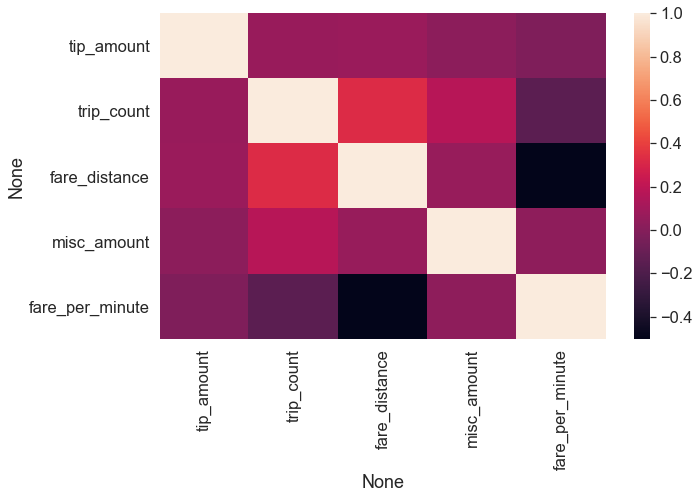

In [22]:
plt.figure(figsize=(10, 6))
# this code is taken from mast30034 tutorial
sns.heatmap(arr[['tip_amount', 'trip_count', 'fare_distance'
                      ,'misc_amount', 'fare_per_minute']].corr())
#plt.savefig('plot/correlation_plot.png')
sns.set(font_scale=1)
plt.show()

In [23]:
arr[['tip_amount', 'trip_count', 'fare_distance'
                      ,'misc_amount', 'fare_per_minute']].corr()

,tip_amount,trip_count,fare_distance,misc_amount,fare_per_minute
tip_amount,1.000000,0.068014,0.074578,0.025775,-0.016869
trip_count,0.068014,1.000000,0.327896,0.173496,-0.147815
fare_distance,0.074578,0.327896,1.000000,0.060376,-0.504207
misc_amount,0.025775,0.173496,0.060376,1.000000,0.032826
fare_per_minute,-0.016869,-0.147815,-0.504207,0.032826,1.000000


#### Get summary statistics for each score block to see their seperation

In [43]:
sample = stratify_sample(arr, 'score_block', 500)

In [14]:
sample.reset_index().to_feather('sample_for_plot.feather')

Trip count

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:918: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, **kwargs)


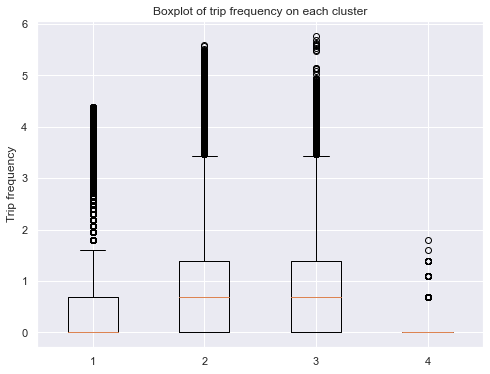

In [85]:
plt.figure(figsize=(8, 6))
plt.boxplot([np.log(arr[arr['score_block']==1]['trip_count']), 
             np.log(arr[arr['score_block']==2]['trip_count']),
             np.log(arr[arr['score_block']==3]['trip_count']),
             np.log(arr[arr['score_block']==4]['trip_count'])])
ax.set_xticklabels(['1', '2', '3', '4'])
plt.title('Boxplot of trip frequency on each cluster')
plt.ylabel('Trip frequency')
plt.show()

Fare/distance

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:918: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, **kwargs)


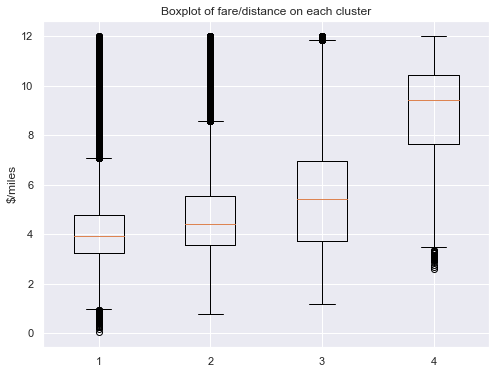

In [45]:
plt.figure(figsize=(8, 6))
plt.boxplot([arr[arr['score_block']==1]['clean_fare_distance'], 
             arr[arr['score_block']==2]['clean_fare_distance'],
             arr[arr['score_block']==3]['clean_fare_distance'],
             arr[arr['score_block']==4]['clean_fare_distance']])
ax.set_xticklabels(['1', '2', '3', '4'])
plt.title('Boxplot of fare/distance on each cluster')
plt.ylabel('$/miles')
plt.show()

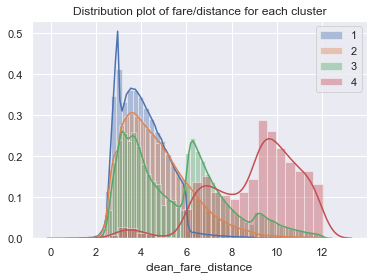

In [63]:
sns.distplot(arr[arr['score_block']==1]['clean_fare_distance'], label='1')
sns.distplot(arr[arr['score_block']==2]['clean_fare_distance'], label='2')
sns.distplot(arr[arr['score_block']==3]['clean_fare_distance'], label='3')
sns.distplot(arr[arr['score_block']==4]['clean_fare_distance'], label='4')
plt.legend()
plt.title('Distribution plot of fare/distance for each cluster')
plt.show()

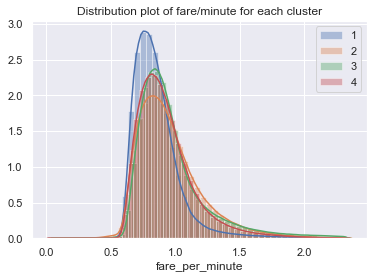

In [47]:
sns.distplot(arr[arr['score_block_kmeans']==1]['fare_per_minute'], label='1')
sns.distplot(arr[arr['score_block_kmeans']==2]['fare_per_minute'], label='2')
sns.distplot(arr[arr['score_block_kmeans']==3]['fare_per_minute'], label='3')
sns.distplot(arr[arr['score_block_kmeans']==4]['fare_per_minute'], label='4')
plt.legend()
plt.title('Distribution plot of fare/minute for each cluster')
plt.show()

Fare/minute

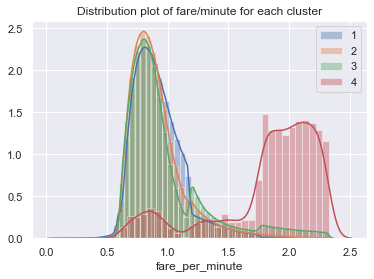

In [64]:
sns.distplot(arr[arr['score_block']==1]['fare_per_minute'], label='1')
sns.distplot(arr[arr['score_block']==2]['fare_per_minute'], label='2')
sns.distplot(arr[arr['score_block']==3]['fare_per_minute'], label='3')
sns.distplot(arr[arr['score_block']==4]['fare_per_minute'], label='4')
plt.legend()
plt.title('Distribution plot of fare/minute for each cluster')
plt.show()

tip amount

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:918: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, **kwargs)


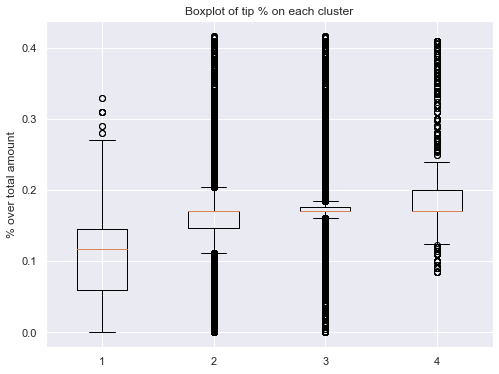

In [65]:
plt.figure(figsize=(8, 6))
plt.boxplot([arr[arr['score_block']==1]['tip_amount'], 
             arr[arr['score_block']==2]['tip_amount'],
             arr[arr['score_block']==3]['tip_amount'],
             arr[arr['score_block']==4]['tip_amount']])
ax.set_xticklabels(['1', '2', '3', '4'])
plt.title('Boxplot of tip % on each cluster')
plt.ylabel('% over total amount')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:918: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, **kwargs)


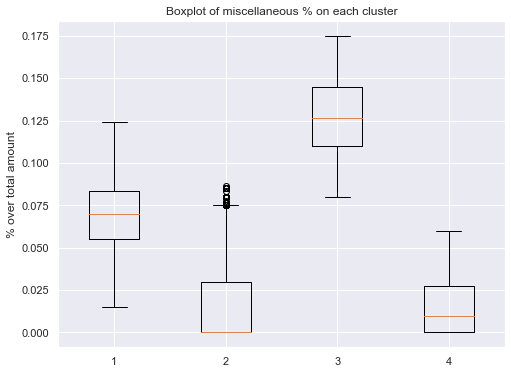

In [49]:
plt.figure(figsize=(8, 6))
plt.boxplot([arr[arr['score_block_kmeans']==1]['misc_amount'], 
             arr[arr['score_block_kmeans']==2]['misc_amount'],
             arr[arr['score_block_kmeans']==3]['misc_amount'],
             arr[arr['score_block_kmeans']==4]['misc_amount']])
ax.set_xticklabels(['1', '2', '3', '4'])
plt.title('Boxplot of miscellaneous % on each cluster')
plt.ylabel('% over total amount')
plt.show()

misclenaneous amount

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:918: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, **kwargs)


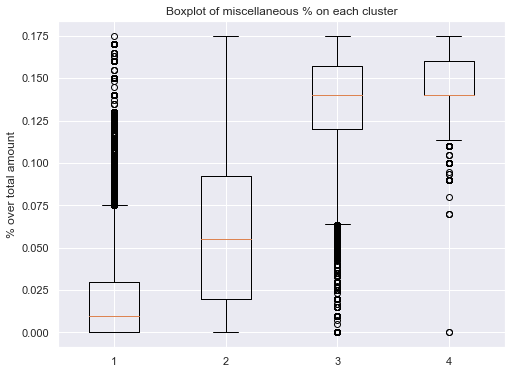

In [81]:
plt.figure(figsize=(8, 6))
plt.boxplot([arr[arr['score_block']==1]['misc_amount'], 
             arr[arr['score_block']==2]['misc_amount'],
             arr[arr['score_block']==3]['misc_amount'],
             arr[arr['score_block']==4]['misc_amount']])
ax.set_xticklabels(['1', '2', '3', '4'])
plt.title('Boxplot of miscellaneous % on each cluster')
plt.ylabel('% over total amount')
plt.show()

In [52]:
fare_distance = make_ss(arr,'score_block',  'clean_fare_distance', sort_att = False)
fare_minute = make_ss(arr,'score_block',  'fare_per_minute', sort_att = False)
misc_amount = make_ss(arr,'score_block',  'misc_amount', sort_att = False)

[1 2 3 4]
[1 2 3 4]
[1 2 3 4]


Summarise on these tables

In [51]:
fare_distance

,clean_fare_distance,clean_fare_distance,clean_fare_distance,clean_fare_distance
count,3.464923e+06,1.143735e+07,1.173877e+06,2355.000000
mean,4.072217e+00,4.696602e+00,5.610645e+00,9.042335
std,1.029985e+00,1.525060e+00,2.152918e+00,1.921011
min,1.997533e-02,7.829847e-01,1.187790e+00,2.574570
25%,3.242763e+00,3.539337e+00,3.702823e+00,7.655515
50%,3.942217e+00,4.409364e+00,5.403500e+00,9.418662
75%,4.770212e+00,5.553114e+00,6.964393e+00,10.456218
max,1.201305e+01,1.201673e+01,1.201684e+01,12.013051


In [53]:
fare_minute

,fare_per_minute,fare_per_minute,fare_per_minute,fare_per_minute
count,3.464923e+06,1.143735e+07,1.173877e+06,2355.000000
mean,9.227052e-01,9.133584e-01,9.801023e-01,1.833495
std,2.052541e-01,2.278101e-01,3.405716e-01,0.429438
min,5.601660e-02,3.302146e-02,1.103448e-01,0.610080
25%,7.770801e-01,7.604563e-01,7.637475e-01,1.762115
50%,8.888889e-01,8.634223e-01,8.715084e-01,1.949107
75%,1.028881e+00,9.967320e-01,1.047619e+00,2.134063
max,2.327456e+00,2.328590e+00,2.328612e+00,2.328590


In [54]:
misc_amount

,misc_amount,misc_amount,misc_amount,misc_amount
count,3.464923e+06,1.143735e+07,1.173877e+06,2355.000000
mean,1.813801e-02,5.852632e-02,1.366336e-01,0.144308
std,2.184767e-02,4.562252e-02,2.698913e-02,0.020131
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,2.000000e-02,1.200000e-01,0.140000
50%,1.000000e-02,5.500000e-02,1.400000e-01,0.140000
75%,3.000000e-02,9.250000e-02,1.575000e-01,0.160000
max,1.750000e-01,1.750000e-01,1.750000e-01,0.175000


By looking at the summary statistics above, it can be seen that the tip in each class may be similar; hence, one will try to refine the cluster by removing the tip

In [103]:
arr.head()

,index,trip_count,tip_amount,clean_fare_distance,fare_per_minute,misc_amount,trip_count_block,tip_amount_block,clean_fare_distance_block,fare_per_minute_block,misc_amount_block,score,score_block,score_block_kmeans,score_block_pca,new_score,new_score_block
0,0,1.0,0.00,5.382422,0.961098,0.00,1,1,2,2,1,7,1,2,1,5,1
1,1,1.0,0.00,2.470896,1.515615,0.09,1,1,1,3,3,9,2,3,1,8,2
2,2,1.0,0.17,5.779702,0.987342,0.05,1,3,2,2,2,10,2,1,1,8,2
3,3,1.0,0.17,3.096418,1.096052,0.01,1,3,2,2,1,9,2,4,1,7,2
4,4,1.0,0.08,3.004514,1.038552,0.00,1,1,1,2,1,6,1,2,1,5,1


In [180]:
arr['new_score'] = arr['clean_fare_distance']+arr['trip_count_block']+arr['fare_per_minute_block']+arr['misc_amount_block']


In [176]:
def binning(data, att):
    for attribute, k in att:
        name = f"{attribute}_block"
        blocks = list(np.linspace(min(data[attribute].values), max(data[attribute].values), k+1))
        data[name] = pd.cut(data[attribute].values, blocks, labels=list(range(1, k+1)), include_lowest = True)
    return data

In [181]:
arr = binning(arr, [['new_score', 4]])

Here, the amount of label 4 has increased more compared to the previous block

In [166]:
class ClusterMetrics:
    
    """
    This metrics is the WSSE/BSSE
    """
    
    def __init__(self, X, y, y_name, scaled = True):
        self.X = X.copy()
        self.y = y
        self.y_name = y_name
        self.clusters = self.y[self.y_name].unique()
    
    def scaler(self):
        scaler = MinMaxScaler()
        self.X[self.X.columns] = scaler.fit_transform(self.X)
    
    def eval_cluster(self):
        
        if self.scaler:
            self.scaler()
        
        cohesion = 0
        separation = 0
        whole_cluster = np.array(np.mean(self.X)).reshape(1, -1)
        
        # iterate each cluster 
        for each_cluster in self.clusters:
            index_y = list(self.y.loc[self.y[self.y_name]==each_cluster, :].index)
            sliced_X = self.X.loc[index_y, :]
            centroid = np.array(np.mean(sliced_X)).reshape(1, -1)
            
            # calculate the distance between each points and centroid only in the cluster
            sliced_X = euclidean_distances(sliced_X, centroid)
            cohesion += sliced_X.sum()
            
            # separation
            n = len(sliced_X)
            separation += euclidean_distances(whole_cluster, centroid)[0][0]*n
            
        return (cohesion, separation, cohesion/separation)

            

In [167]:
def stratify_sample(data, att, n):
    lst_data = []
    unique_att = data[att].unique()
    for each_label in unique_att:
        lst_data.append(data[data[att]==each_label].sample(n=n))
    samples = lst_data[0]
    for each_data in lst_data[1:]:
        samples = pd.concat([samples, each_data])
    return samples

In [182]:
new_arr = arr.copy()
new_arr = new_arr[['trip_count','clean_fare_distance', 'fare_per_minute', 'misc_amount', 'new_score_block']]

In [183]:
# score block manual cluster check
check = ClusterMetrics(new_arr[new_arr.columns[:4]],pd.DataFrame(new_arr[new_arr.columns[-1]]), 'new_score_block')
res = check.eval_cluster()

print('Result: ')
print('Cohesion:', res[0])
print('Seperation:', res[1])
print('Cohesion/Seperation:', res[-1])

Result: 
Cohesion: 4033871.9043291504
Seperation: 1597757.4934513976
Cohesion/Seperation: 2.52470848727824


As you can see, the result if worst than the old clusters; hence, it may be best to continue using the old cluster instead.